# Módulo 03: Machine Learning

# Aula 01 - Introdução ao Machine Learning

Fala galera! Tudo bem? Finalmente chegamos em um dos módulos mais interessantes do curso: aprendizado de máquina, o famoso Machine Learning! Nesse módulo, o foco continua: queremos encontrar maneiras de modelar fatos do mundo real a partir de dados. Até agora, vocês o fizeram de maneira mais artesanal, manual, com métodos estatísticos mais tradicionais. Porém, precisamos nos lembrar do tripé do cientista de dados:
<br>
![Data Science Venn Diagram](https://cdn-images-1.medium.com/max/1600/1*WvOnZ27TdPUbJfa9q21QJw.png)
<br>
Um dos pilares de um cientista de dados são seus 'hacking skills', ou seja, sua capacidade de automatizar tarefas por meio de código. Isso é muito importante pois, na medida que nosso objetivo é criar valor a partir de dados, esse objetivo deve ser escalável, senão não conseguiremos lidar com problemas mais complexos e maiores. Um bom exemplo disso é a maneira como fazíamos visão computacional no passado: tínhamos que, manualmente, criar filtros e regras para processar uma imagem, e isso é maçante.  Além disso, um algoritmo feito para reconhecer faces humanas seria muito diferente de outro feito para reconhecer estradas e carros. Com o advento das redes neurais convolucionais (ConvNets), conseguimos finalmente aplicar uma arquitetura capaz de lidar com ambos os tipos de inputs de forma escalável, sem serem programados *explicitamente* para realizar essa tarefa.<br>
Essa é a importância do machine learning para nós: é sair da ciência de dados artesanal e entender como aplicar seus princípios e métodos de forma automatizada e escalável, por meio de programação *implícita*. Coloco foco nessa palavra, implícita, pois ela carrega a ideia principal do machine learning: ao invés de descobrir quais são as regras, o *mapping* que regem nossos dados e passarmos isso para o código, nossa estratégia agora é aplicar métodos matemáticos de forma que o algoritmo por si mesmo descubra essas regras, criando assim um modelo de nossos dados. Dessa forma, os algoritmos de machine learning, aplicados nas condições certas, conseguem aprender como executar uma gama gigantesca de tarefas. <br> 
Vamos, então, definir e entender melhor o que é o machine learning e como aplicá-lo nos módulos 3 e 4. No módulo 3, nosso foco será entender os conceitos básicos e ferramental necessário para a maioria dos algoritmos e arquiteturas de machine learning. No módulo 4, atacaremos famílias de problemas com diversas técnicas para criar nosso arsenal de algoritmos. Isso é necessário pois um cientista de dados precisa estar munido de diversas técnicas para atacar seus problemas do dia-a-dia. Bora começar!

## Afinal, o que é Machine Learning?

No tópico acima, mencionamos que machine learning está relacionado ao que chamei de programação implícita. Mas o que seria isso? Vou me apoiar na definição de Tom Mitchell: *um programa de computador é dito que **aprende** de uma experiência E em respeito a uma série de tarefas T e medido com uma performance P, se P em T melhora com as experiências E*. Portanto, partimos de um ponto de vista no qual para um algoritmo aprender a realizar uma **tarefa**, ele realizará interações e experimentos com os dados relacionados a essa tarefa de modo a adquirir experiência. Porém, assim como guiamos o aprendizado de uma criança, a **experiência adquirida deve ser direcionada**. Para isso, definimos uma **métrica de performance**, que agirá como um norte para que o algoritmo consiga entender quais experiências e ações são benéficas para seu aprendizado. <br>
Mas no aspecto prático, como se dá esse aprendizado? Embora existam 2 tipos básicos de aprendizado (o supervisionado e o não-supervisionado), o conceito básico do machine learning para aprendizado de uma tarefa a partir de dados é que esses dados carregam em si uma informação que representa seu comportamento no mundo real, uma correlação entre a natureza de seus dados e seu comportamento no mundo real: seu **mapping**. Ao encarar o mapping de um dataset como uma função, podemos então definir uma série de mecanismos para que possamos descobrir como ela é e reproduzí-la! <br>
A nomemclatura do processo de descoberta e reprodução da função interna de nossos dados é **otimização** de um modelo: dados os parâmetros desse modelo, como escolher os melhores valores possíveis e viáveis para que ele adquira a forma mais representativa dessa função? Para isso, imagine que estamos usando uma equação quadrática para prever a trajetória de um lançamento oblíquo de uma bola. Queremos achar os melhores valores de g para que nosso modelo faça sentido (que no caso será algo em torno de -9,81). Num primeiro momento, nosso modelo terá uma diferença de forma em relação aos dados corretos: se nosso g for menor, o modelo estimará lançamentos mais longos que o real, se for maior, lançamentos mais curtos. Então a variação do parâmetro g implica numa diferença numérica entre resultados modelados e observados. Ao conjunto dessas diferenças damos o nome de **função custo**. Ao otimizar g, nosso procedimento será de minimizar esse erro modelado, e é por isso que ter uma métrica de performance, que **define o erro remanescente no modelo**, é tão importante e guia o aprendizado de nosso algoritmo. Aprendizado como fazemos hoje está atrelado à diminuição de algum tipo de erro. Então encare ML quase como brincar de Marco Polo ;)
Vamos a um exemplo mais prático agora.
 
 
### Exemplo de aprendizagem supervisionada: Regressão linear simples

Como exemplo desse processo, vamos considerar uma regressão linear simples, ou seja, o caso comum de ajustar uma linha a dados com a forma $(x, y)$.

Vamos gerar o seguinte conjunto de dados para nosso exemplo de regressão:

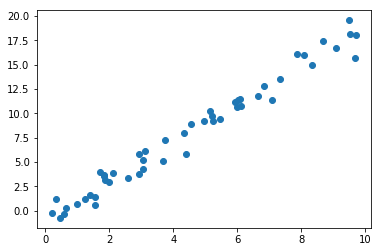

In [1]:
#importando biblioteca de visualização de dados e numpy
import matplotlib.pyplot as plt 
import numpy as np

#jupyter magic command para que não precisemos chamar o .show() em cada plot
%matplotlib inline 


#criação de uma dispersão linear randômica. 42 is always the answer
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)

# Traçamos
plt.scatter(x, y);

In [2]:
x.shape

(50,)

Depois de gerar os dados, podemos usar a receita que estudamos antes. Vamos ver os passos do processo: 

#### 1. Selecionar uma “classe de modelo”

Em Scikit-Learn, cada classe de modelo é representada com uma classe de Python. 

Então, por exemplo, se queremos calcular um modelo de regressão linear simples, podemos importar a classe de regressão linear desta forma:

In [3]:
from sklearn.linear_model import LinearRegression


from sklearn.linear_model import ElasticNet

Lembre que também existem outros modelos de regressão linear mais gerais. Você pode ler mais sobre eles na [documentação ``sklearn.linear_model``](http://Scikit-Learn.org/stable/modules/linear_model.html). 

#### 2. Escolher os hiperparâmetros do modelo

É importante destacar que *uma classe de modelo não é a mesma coisa que uma instância de modelo*.

Depois de definir a classe de modelo, ainda é preciso tomar algumas decisões. Dependendo da classe de modelo escolhida para trabalhar, poderíamos ter que responder a uma ou mais perguntas, por exemplo:

- Queremos ajustar também uma interceptação (intercept = True)?
- Queremos que o modelo esteja normalizado?
- Queremos adicionar features calculadas a partir do input para aumentar a flexibilidade do modelo?
- Que grau de "regularização" queremos usar no modelo?

Esses são exemplos das decisões importantes que devem ser tomadas 
**depois de selecionar a classe de modelo a usar**.

Frequentemente, essas escolhas são representadas como *hiperparâmetros*, ou parâmetros que devem ser definidos antes que o modelo seja ajustado aos dados. 

Em Scikit-Learn, os hiperparâmetros são escolhidos como argumentos na instanciação do modelo. Nas próximas aulas, vamos explorar como justificar quantitativamente a escolha de hiperparâmetros.  

Para o nosso exemplo de regressão linear, podemos instanciar a classe ``LinearRegression`` e especificar que gostaríamos de ajustar a interceptação usando o hiperparâmetro ``fit_intercept``: 

In [4]:
model2 = ElasticNet()

In [5]:
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

**Atenção**: quando o modelo é instanciado, a única ação que acontece é o armazenamento dos valores de hiperparâmetros.

Especificamente, ainda não aplicamos o modelo a nenhum dado: a API de Scikit-Learn faz uma distinção muito clara entre a *escolha do modelo com hiperparâmetros* e a *aplicação do modelo aos dados*. 

#### 3. Preparar os dados em uma matriz de features e um vetor target

Já falamos da representação de dados de Scikit-Learn, que exige uma matriz de features de duas dimensões e um vetor target de uma dimensão.

Aqui, a variável target ``y`` já está no formato correto (um array de comprimento ``n_samples``), mas precisamos processar os dados em ``x`` para transformá-los em uma matriz de tamanho ``[n_samples, n_features]``.

Nesse caso, isso se reduz a uma simples mudança de forma (reshaping) do array de uma dimensão: 

In [6]:
X = x[:, np.newaxis]
X.shape

# Outra forma de fazer isso
# X = x.reshape(-1,1)

(50, 1)

#### 4. Ajustar o modelo aos dados

Agora, é hora de aplicar o modelo aos dados.
É possível fazer isso com o método ``fit()`` da instância de modelo.

In [7]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

O método ``fit()`` faz uma sequência de cálculos internos que dependem do modelo, e os resultados dessas operações são armazenados em atributos específicos da classe de modelo que o usuário poderá explorar.

Em Scikit-learn, por convenção, todos os atributos que representam os parâmetros dos modelos que foram aprendidos durante o processo de treinamento com ``fit()`` têm `sublinhados` nos nomes; por exemplo, neste modelo linear, podemos observar os parâmetros coef_ e intercept_:

In [8]:
model.coef_

array([1.9776566])

In [9]:
model.intercept_

-0.9033107255311164

Esses dois parâmetros representam a inclinação ( o $\beta_1$ do statsmodel) e o e o intercepto ($\beta_0$) do ajuste linear simples aos dados. 
Fazendo uma comparação com a definição do conjunto de dados sintético criado no início do exemplo, podemos ver que eles estão muito próximos dos definidos inicialmente ao gerar os dados, 2 e -1.

Uma pergunta que surge com frequência tem a ver com a incerteza (uncertainty) nesses parâmetros internos do modelo. 

Em geral, Scikit-Learn não oferece ferramentas para tirar conclusões sobre o estado interno dos modelos: interpretar os parâmetros de um modelo tem muito mais a ver com *modelagem estatística* que com *machine learning*.

Machine learning, por sua vez, enfoca a qualidade com a qual o modelo *faz previsões*.

Se quiser investigar o significado dos parâmetros de ajuste dentro do modelo, existem outras ferramentas, incluindo o pacote de python [Statsmodels](http://statsmodels.sourceforge.net/).

In [10]:
model.predict([[4]])

array([7.00731568])

#### 5. Prever para dados desconhecidos

Depois que o modelo é treinado, a principal tarefa na aprendizagem supervisionada é fazer uma avaliação com base no que o modelo diz sobre os novos dados que não fizeram parte do **conjunto de treinamento**. 

Em Scikit-Learn, é possível fazer isso usando o método ``predict()``. 
No contexto deste exemplo, o “novo conjunto de dados” será um vetor de valores *x*, e observaremos os valores *y* previstos pelo modelo.

In [11]:
xfit = np.linspace(-1, 11)
xfit

array([-1.        , -0.75510204, -0.51020408, -0.26530612, -0.02040816,
        0.2244898 ,  0.46938776,  0.71428571,  0.95918367,  1.20408163,
        1.44897959,  1.69387755,  1.93877551,  2.18367347,  2.42857143,
        2.67346939,  2.91836735,  3.16326531,  3.40816327,  3.65306122,
        3.89795918,  4.14285714,  4.3877551 ,  4.63265306,  4.87755102,
        5.12244898,  5.36734694,  5.6122449 ,  5.85714286,  6.10204082,
        6.34693878,  6.59183673,  6.83673469,  7.08163265,  7.32653061,
        7.57142857,  7.81632653,  8.06122449,  8.30612245,  8.55102041,
        8.79591837,  9.04081633,  9.28571429,  9.53061224,  9.7755102 ,
       10.02040816, 10.26530612, 10.51020408, 10.75510204, 11.        ])

Assim como antes, precisamos manipular os valores *x* em uma matriz de features de tamanho ``[n_samples, m_features]``. Só depois desse passo será possível utilizá-la como argumento para a previsão. 

In [12]:
Xfit = xfit[:, np.newaxis]
Xfit[:10]

array([[-1.        ],
       [-0.75510204],
       [-0.51020408],
       [-0.26530612],
       [-0.02040816],
       [ 0.2244898 ],
       [ 0.46938776],
       [ 0.71428571],
       [ 0.95918367],
       [ 1.20408163]])

In [13]:
yfit = model.predict(Xfit)
yfit

array([-2.88096733, -2.39664326, -1.9123192 , -1.42799513, -0.94367106,
       -0.459347  ,  0.02497707,  0.50930113,  0.9936252 ,  1.47794926,
        1.96227333,  2.44659739,  2.93092146,  3.41524552,  3.89956959,
        4.38389366,  4.86821772,  5.35254179,  5.83686585,  6.32118992,
        6.80551398,  7.28983805,  7.77416211,  8.25848618,  8.74281024,
        9.22713431,  9.71145837, 10.19578244, 10.68010651, 11.16443057,
       11.64875464, 12.1330787 , 12.61740277, 13.10172683, 13.5860509 ,
       14.07037496, 14.55469903, 15.03902309, 15.52334716, 16.00767122,
       16.49199529, 16.97631936, 17.46064342, 17.94496749, 18.42929155,
       18.91361562, 19.39793968, 19.88226375, 20.36658781, 20.85091188])

Por último, para visualizar os resultados, vamos traçar primeiro os dados originais e, em seguida, o ajuste do modelo linear:

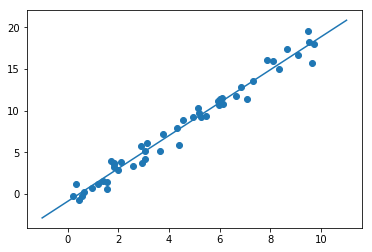

In [14]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

Normalmente, a eficácia do modelo é avaliada por meio da comparação dos resultados com algum baseline conhecido, como veremos no próximo exemplo.

### Exemplo de aprendizagem supervisionada: Classificação com o conjunto de dados Iris

Vamos ver mais um exemplo desse processo, usando o conjunto de dados Iris que mencionamos antes. 
A pergunta será esta: usando um modelo treinado em uma parte do conjunto de dados Iris, com que eficácia será possível prever os valores restantes?

In [15]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [17]:
iris.species.value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

In [18]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


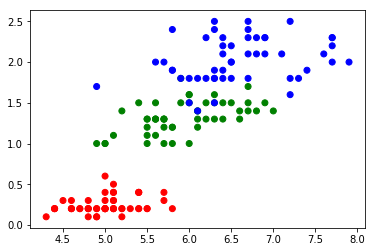

In [19]:
fig, ax = plt.subplots()
colors = {'setosa':'red', 'virginica':'blue', 'versicolor':'green'}

ax.scatter(iris['sepal_length'],
           iris['petal_width'],
           c=iris['species'].apply(lambda x: colors[x]))

C:\Users\marcos.silva\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


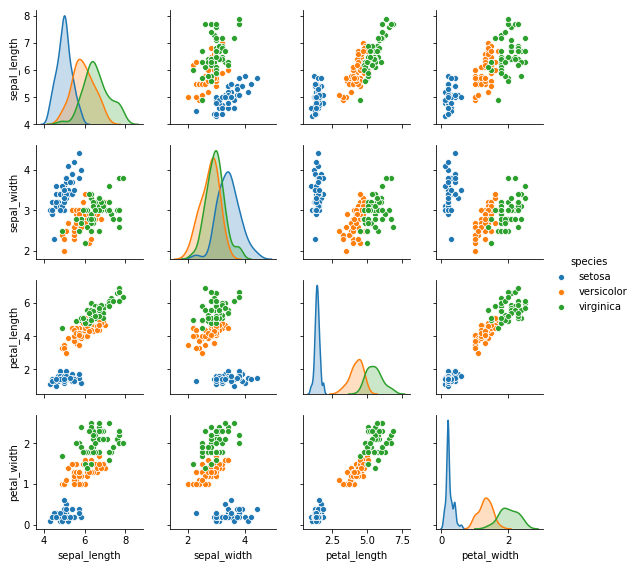

In [20]:
import seaborn as sns

sns.pairplot(iris, hue="species", size=2)

In [21]:
X_iris = iris[['sepal_length', ]]

In [22]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [23]:
y_iris = iris['species']
y_iris.shape

(150,)

Para esta tarefa, vamos usar um modelo generativo bastante simples, conhecido como Naive Bayes Gaussiano, que presume que cada classe é construída a partir de uma distribuição Gaussiana. Vamos ver mais detalhes sobre ele mais adiante no curso.

Como é muito rápido e não tem hiperparâmetros para escolher, Naive Bayes Gaussiano costuma ser um bom modelo para usar como classificação baseline antes de explorar se é possível conseguir melhorias usando modelos mais sofisticados.



Com os dados preparados, podemos seguir a receita para prever o restante:

In [24]:
import sklearn

In [26]:
# model3 = sklearn.naive_bayes.GaussianNB()

In [27]:
%time from sklearn.naive_bayes import GaussianNB # 1. escolher a classe de modelo
%time model3 = GaussianNB() # 2. instanciar o modelo
%time model3.fit(X_iris, y_iris) # 3. ajustar o modelo aos dados
%time yhat = model3.predict(X_iris) # 4. prever

Wall time: 996 µs
Wall time: 0 ns
Wall time: 996 µs
Wall time: 0 ns


In [28]:
lista_concatenada = list(zip(list(yhat), list(y_iris)))

In [29]:
corretos = 0
erros = 0

for i in (lista_concatenada):
    if i[0] == i[1]:
        corretos += 1
    else:
        erros += 1

In [30]:
corretos / (corretos + erros)

0.96

In [31]:
comparativo = list(zip(list(y_iris), list(yhat)))

acertos = 0
erros = 0

for row in comparativo:
    if row[0]==row[1]:
        acertos += 1
    else:
        erros += 1
        
print(f'''Acertos: {acertos},
Erros: {erros},
Taxa: {acertos/(acertos+erros)}''')

Acertos: 144,
Erros: 6,
Taxa: 0.96


Alguém pode dizer que não é justo eu usar um dado de treinamento como um dado de teste, afinal ele participou das "regras" que o algoritmou criou para separar o dataset ...

Queremos avaliar o modelo em dados que não tenham sido usados no treinamento, por isso vamos dividir os dados em um *conjunto de treinamento* e um *conjunto de teste*.

Poderíamos fazer isso manualmente, mas é mais prático usar a função ``train_test_split``.

In [32]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [33]:
print(Xtest.shape)
print(ytest.shape)

(38, 4)
(38,)


In [34]:
print(Xtrain.shape)
print(ytrain.shape)

(112, 4)
(112,)


In [35]:
from sklearn.naive_bayes import GaussianNB # 1. escolher a classe de modelo
model = GaussianNB() # 2. instanciar o modelo
model.fit(Xtrain, ytrain) # 3. ajustar o modelo aos dados
yhat = model.predict(Xtest) # 4. prever com dados *NOVOS* (que não participaram do treino)

Por último, podemos usar a função ``accuracy_score`` para estudar a proporção dos valores previstos que coincidem com o valor real correspondente a essa observação.

In [36]:
# from sklearn.metrics import accuracy_score # método nutella
# accuracy_score(ytest, y_model)

comparativo = list(zip(list(ytest), list(yhat)))

acertos = 0
erros = 0
for row in comparativo:
    if row[0]==row[1]:
        acertos += 1
    else:
        erros += 1
        
print(f'''Acertos: {acertos},
Erros: {erros},
Taxa: {acertos/(acertos+erros)}''')

Acertos: 37,
Erros: 1,
Taxa: 0.9736842105263158


Com precisão superior a 97%, podemos ver que até mesmo esse simples algoritmo de classificação é efetivo para esse conjunto de dados específico.

### Exemplo de aprendizagem não supervisionada: Dimensionalidade de Iris

Como exemplo de problema de aprendizagem não supervisionado, vamos ver como reduzir a dimensionalidade dos dados de Iris para facilitar a visualização. 

Lembrem que o conjunto de dados Iris tem quatro dimensões: há quatro features medidas para cada observação (sample).

A tarefa de redução da dimensionalidade é investigar se existe uma representação apropriada de baixa dimensionalidade que mantenha as características essenciais do conjunto de dados original. 

Frequentemente, a redução da dimensionalidade é usada como ajuda para visualizar os dados: afinal, é muito mais fácil traçar os dados em duas dimensões que em quatro ou mais. 

Neste exemplo, vamos usar Principal Component Analysis (PCA), que é uma técnica rápida de redução linear da dimensionalidade. 
Vamos pedir para o modelo retornar dois componentes, ou seja, uma representação bidimensional dos dados. 

Seguindo a sequência de passos apresentada anteriormente, temos:

In [37]:
# 1. Selecionar a classe de modelo
from sklearn.decomposition import PCA  

# 2. Instanciar o modelo com hiperparâmetros
model = PCA(n_components=2)

# 3. Ajustar aos dados. Observar que não especificamos “y” 
model.fit(X_iris)

# 4. Transformar os dados em duas dimensões
X_2D = model.transform(X_iris)

In [38]:
X_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [39]:
X_2D[:5]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

Agora, vamos traçar os resultados. Uma forma rápida de fazer isso é inserir os resultados no ``DataFrame`` original de Iris e usar o método ``lmplot`` de Seaborn para mostrar os resultados:


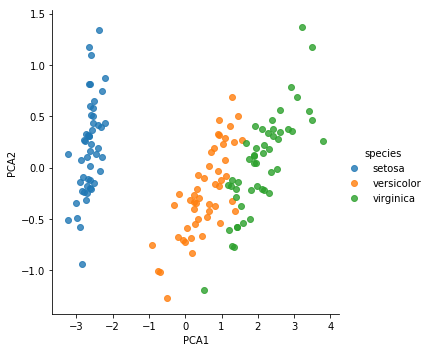

In [40]:
iris_pca = iris.copy(deep=True)
iris_pca['PCA1'] = X_2D[:, 0]
iris_pca['PCA2'] = X_2D[:, 1]
sns.lmplot('PCA1', 'PCA2', hue='species', data=iris_pca, fit_reg=False);

Vemos que, na representação em duas dimensões, as espécies estão relativamente bem separadas, ainda que o algoritmo PCA não tivesse conhecimento das tags das espécies de flores! 

Isso indica que uma classificação relativamente simples deveria funcionar com esse conjunto de dados, como vimos antes. 

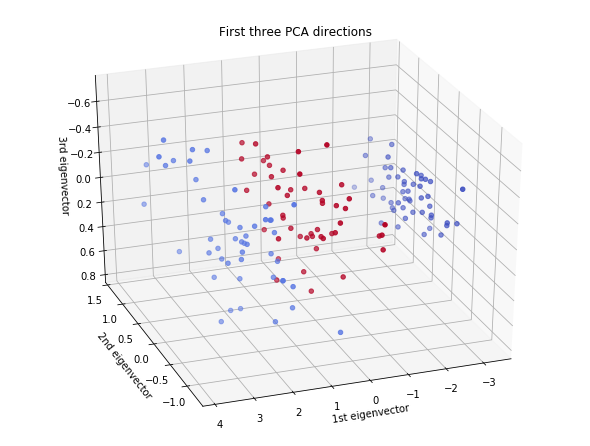

In [41]:
from mpl_toolkits.mplot3d import Axes3D

# Podemos também reduzir as 4 dimensões originais para 3 por exemplo e plotar um gráfico em 3d:
iris = sns.load_dataset('iris')

X = X_iris
Y = y_iris
z = {'setosa': 5, 'versicolor': 25, 'virginica': 7}

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(X_iris)

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y.map(z),
           cmap=plt.cm.coolwarm)

ax.set_title("First three PCA directions")

ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

plt.show()

### Aprendizagem não supervisionada: Clustering com Iris

Vamos aplicar um algoritmo de clustering ao conjunto de dados Iris.

Um algoritmo de clustering tenta encontrar grupos diferentes sem fazer referência a tags nos dados. 

Vamos usar um método avançado de clustering chamado Gaussian Mixture Model (GMM). 
O GMM tenta modelar os dados como uma coleção subgrupos Gaussianos. 

Podemos ajustar o GMM da seguinte forma:

In [42]:
# 1. Escolhemos a classe de modelo
from sklearn.mixture import GaussianMixture

# 2. Instanciamos o modelo com hiperparâmetros
model = GaussianMixture(n_components=3, covariance_type='full')

# 3. Ajustamos aos dados. Observar que “y” não é especificado
model.fit(X_iris)

# 4. Definimos os nomes dos clusters
y_gmm = model.predict(X_iris)  

In [43]:
iris_pca['cluster'] = y_gmm
iris_pca

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2,cluster
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,1
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,1
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,1
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,1
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,1
5,5.4,3.9,1.7,0.4,setosa,-2.280860,0.741330,1
6,4.6,3.4,1.4,0.3,setosa,-2.820538,-0.089461,1
7,5.0,3.4,1.5,0.2,setosa,-2.626145,0.163385,1
8,4.4,2.9,1.4,0.2,setosa,-2.886383,-0.578312,1
9,4.9,3.1,1.5,0.1,setosa,-2.672756,-0.113774,1


Como antes, vamos adicionar os "titulos" dos clusters ao ``DataFrame`` Iris e usar Seaborn para traçar os resultados:

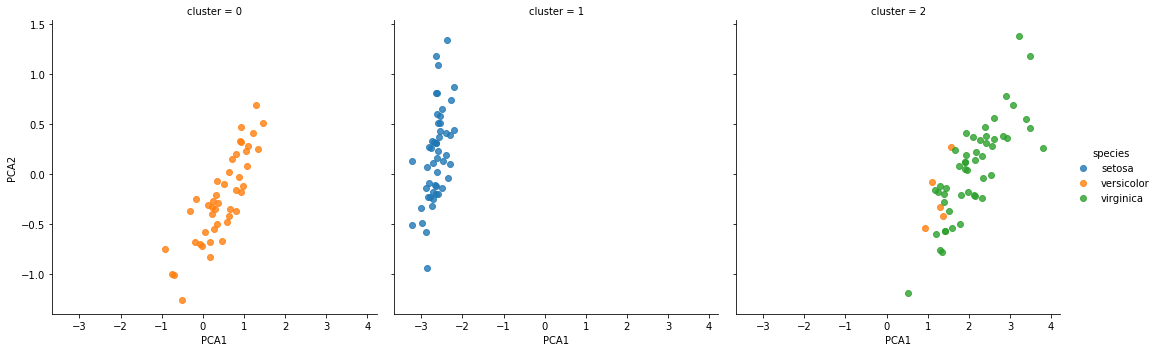

In [44]:
sns.lmplot("PCA1",
           "PCA2",
           data=iris_pca,
           hue='species',
           col='cluster',
           fit_reg=False);

Depois de separar os dados por número de cluster, vemos exatamente o grau de eficiência com que o algoritmo GMM recuperou os grupos subjacente: a espécie *setosa* é separada perfeitamente dentro do cluster 0, embora apareça uma pequena parte misturada entre *versicolor* e *virginica*. 

Isso significa que mesmo sem um especialista que nos diga as classificações de cada flor, as medidas dessas observações são suficientemente diferentes para que seja possível identificar *automaticamente* a presença desses diferentes grupos de espécies com um simples algoritmo de clustering. 

Esse tipo de algoritmo poderia até dar aos especialistas na disciplina algumas pistas sobre as relações entre as amostras observadas (??).

## Resumindo

Nesta seção, abordamos as características essenciais da representação de dados em Scikit-Learn e a API de estimadores. 

Sem importar o tipo de estimador, o mesmo padrão de importar/instanciar/ajustar/prever se mantém em todos os casos. 

Com essas novas informações sobre a API de estimadores, você pode explorar a documentação de Scikit-Learn e começar a testar vários modelos sobre os dados. 

# Apêndice

Para contextualização dos cálculos necessários para o aprendizado do curso e principalmente para a sequência deste módulo, apresentamos o vídeo abaixo como uma boa explanação de como o estudo da variação da variação de funções nos ajudará a explicar as transformações matemáticas utilizadas por um cientista de dados durante a formulação e utilização de modelos de Machine Learning, que está aqui representada por equações diferenciais.

In [45]:
from IPython.display import HTML

HTML('<iframe width="1150" height="647" src="https://www.youtube.com/embed/p_di4Zn4wz4" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

C:\Users\marcos.silva\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")
